In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# this last line help to reduce the code like if don't have then we need to do some more code (plt.show()) 
# i just want to optimize the process with the help of %matplotlib inline

In [2]:
# i just load this file no need to wirte a path because im working with same folder where file is available (/)

shampoo = pd.read_csv('shampoo.csv')

In [3]:
shampoo.head()

,Month,Sales
0,01-Jan,266.0
1,02-Jan,145.9
2,03-Jan,183.1
3,04-Jan,119.3
4,05-Jan,180.3


In [4]:
type(shampoo)

pandas.core.frame.DataFrame

In [5]:
# as we see this a dataframe but we need time series

# if want to know what type of parameters they want to use shift+tab+tab

# in interview they asked how you will import csv file as a time series 
# we use index_col --- we use 0 because our data column index is 0 position 
# parse_dates --- True (means we want this column it will be a proper data)
# squeeze --- True (help to convert in time series)


shampoo = pd.read_csv('shampoo.csv', index_col = [0], parse_dates = True, squeeze = True)

In [6]:
type(shampoo)

pandas.core.series.Series

In [7]:
shampoo.head()

Month
01-Jan    266.0
02-Jan    145.9
03-Jan    183.1
04-Jan    119.3
05-Jan    180.3
Name: Sales, dtype: float64

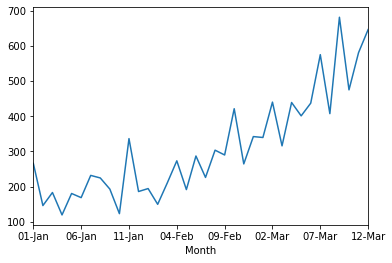

In [8]:
# we plot a line on shampoo series
# pandas have inbliuld function help to plot 

shampoo.plot()

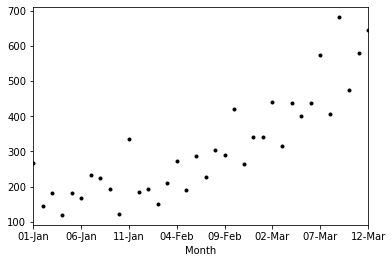

In [9]:
# we also change the style of the plot
# here i csn show you
# just add style parameter and k(*,^,+,.,etc) in a string it will show you 

shampoo.plot(style = 'k.')

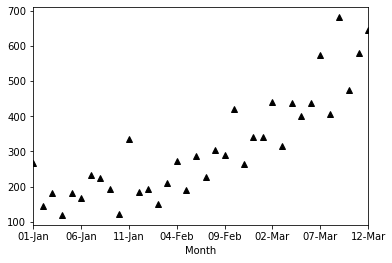

In [10]:
shampoo.plot(style = 'k^')

In [11]:
# if we want to know how many row we have 
# size give the count of rows

shampoo.size

36

In [12]:
# shape also give same output
shampoo.shape

(36,)

In [13]:
# there are two imp. thing after discribe or any other end with '()' is name is method
# and like shape , size this kind is called property

# describe help to see the statical analysis like center of central tendency

shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [14]:
# if we doing time seies one of the process is smoothing analysis
# it not a big thing it is just we caculating the moving average

shampoo_MA = shampoo.rolling(window = 10).mean()

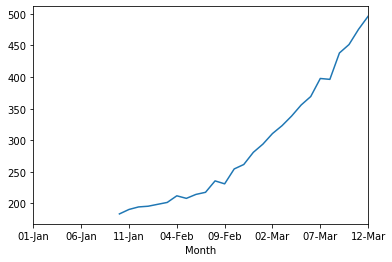

In [15]:
shampoo_MA.plot()

# here we see this curve is very smooth and moving avg. (MA) is mostly used in stock market analysis 

# this curve is just for the presentation 
# here i create a baseline model like how i calculate the moving avg.

In [16]:
shampoo.head()

Month
01-Jan    266.0
02-Jan    145.9
03-Jan    183.1
04-Jan    119.3
05-Jan    180.3
Name: Sales, dtype: float64

### here window = 10 means we take 0 to 9 valeus from the head and taking moving averge on it and after the we calcualte the next months data

In [17]:
# there are three name of this like :

# what is baseline model, what is naive model and what is starting model

# in this model everyone creates what is in like we Previous value is the best refector of the next value
# like 266 is the best reflector or like predictor for 02 jan




In [18]:
# shift method help you to shift the value to the next

shampoo_baseline_Model = pd.concat([shampoo,shampoo.shift(1)], axis = 1)

In [19]:
shampoo_baseline_Model.head()

,Sales,Sales
Month,,
01-Jan,266.0,NaN
02-Jan,145.9,266.0
03-Jan,183.1,145.9
04-Jan,119.3,183.1
05-Jan,180.3,119.3


In [20]:
# here i see i have done the shifting part but the column names are same we have the change the name

shampoo_baseline_Model.columns

Index(['Sales', 'Sales'], dtype='object')

In [21]:
# im using same method which a use in previous code

shampoo_baseline_Model.columns = ['Actual_sales', 'Forecast_sales']

In [22]:
shampoo_baseline_Model.head()

,Actual_sales,Forecast_sales
Month,,
01-Jan,266.0,NaN
02-Jan,145.9,266.0
03-Jan,183.1,145.9
04-Jan,119.3,183.1
05-Jan,180.3,119.3


In [23]:
# here i see we have a na value so we remove it

shampoo_baseline_Model.dropna(inplace = True)

In [24]:
# here i import the mean_sqquared_error for see the error vlaues

import numpy as np
from sklearn.metrics import mean_squared_error

In [25]:
shampoo_error = mean_squared_error(shampoo_baseline_Model.Actual_sales, shampoo_baseline_Model.Forecast_sales)

In [26]:
shampoo_error

11715.388285714285

In [27]:
# here i see we not comapre with our values so we need to sqrt of this value

np.sqrt(shampoo_error)

108.23764726616282

In [28]:
# as we see 108 is error with the help of baseline model 
# we have also doing some more model to find what give us the minimum error
# ARIMA model, Moving averge , auto regressor

# in. this time most of the people use ARIMA modle because it is integrated with auto regressor and moving avg.
# we also find AR and MA with the help of ARIMa model like

# ARIMA(p,d,q) 
# p is for auto regresor and q is for moving avg and d is for Difference 

#if i want to create auto regression i just put one value here i show you
# ARIMA(2,0,0)


#if i want to create moving Average i just put one value here i show you like this
# ARIMA(0,0,2) 

# we calculate auto regression and moving Average with acf and pacf 
# pacf is for p like auto regreesive and acf is for moving avg.



In [29]:
# this library help to acf and pacf

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

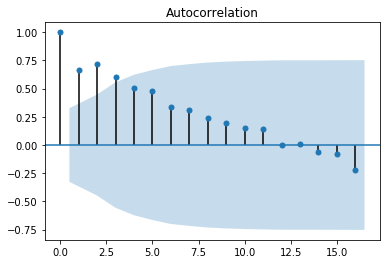

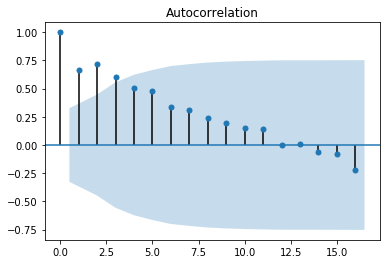

In [30]:
plot_acf(shampoo)

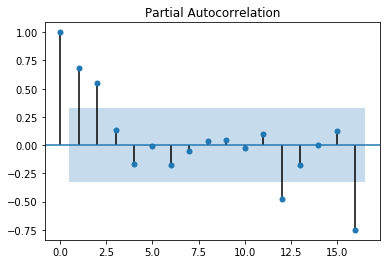

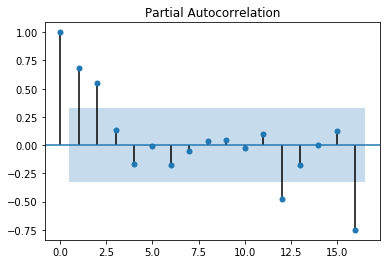

In [31]:
plot_pacf(shampoo)

In [32]:
# here i see the corelation between them it wil decresed
# so the blue color show the critical range outside of the critical range we take as a no.
# start counting with 0 


#  like acf (q) == moving avg. (3)
#. like pacf (p) == auto regresive (2)
#. usually d is stand between 0-2 


In [33]:
from statsmodels.tsa.arima_model import ARIMA



In [34]:
# here we do train and test but not taking ramdon data here we take sequentially data

shampoo_train = shampoo[0:25]
shampoo_test = shampoo[25:36]

In [35]:
shampoo_ARIMA_model = ARIMA(shampoo_train, order = (3,1,2))


# here we give the values is not consistent so we do some other combination on it

/Users/rishabhraibhandar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/rishabhraibhandar/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [36]:
# here i remove this warning

import warnings
warnings.filterwarnings('ignore')

In [37]:
shampoo_arima_modelfit = shampoo_ARIMA_model.fit()

In [38]:
shampoo_arima_modelfit.aic

272.38919480718425

### The AIC function is 2K – 2(log-likelihood). Lower AIC values indicate a better-fit model, and a model with a delta-AIC (the difference between the two AIC values being compared) of more than -2 is considered significantly better than the model it is being compared to.

In [39]:
shampoo_forecast = shampoo_arima_modelfit.forecast(steps = 11)[0]



In [40]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forecast))

# it is higher then the baseline model so our baseline move have a less error as comapre to ARIMA modle

130.9269055976984

In [41]:
p_values = range(0,5)
d_values = range(0,3)
q_values = range(0,5)

In [42]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train, test = shampoo[0:25], shampoo[25:36]
            prediction = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train, order)
                    model_fit = model.fit(disp = 0)
                    pred_y = model_fit.forecast()[0]
                    prediction.append(pred_y)
                    error = np.sqrt(mean_squared_error(test, prediction))
                    print('ARIMA%s : RMSE %0.2f'% (order, error))
                except: 
                    continue

ARIMA(0, 0, 0) : RMSE 279.20
ARIMA(0, 0, 1) : RMSE 264.80
ARIMA(0, 0, 2) : RMSE 242.01
ARIMA(0, 0, 3) : RMSE 249.06
ARIMA(0, 1, 0) : RMSE 183.98
ARIMA(0, 1, 1) : RMSE 201.63
ARIMA(0, 1, 2) : RMSE 185.77
ARIMA(0, 2, 0) : RMSE 184.44
ARIMA(0, 2, 1) : RMSE 168.50
ARIMA(1, 0, 0) : RMSE 247.30
ARIMA(1, 0, 1) : RMSE 215.71
ARIMA(1, 0, 2) : RMSE 209.58
ARIMA(1, 1, 0) : RMSE 178.01
ARIMA(1, 1, 1) : RMSE 205.37
ARIMA(1, 2, 0) : RMSE 137.28
ARIMA(1, 2, 1) : RMSE 161.65
ARIMA(2, 0, 0) : RMSE 212.72
ARIMA(2, 0, 1) : RMSE 177.27
ARIMA(2, 0, 4) : RMSE 109.48
ARIMA(2, 1, 0) : RMSE 188.38
ARIMA(2, 1, 1) : RMSE 199.08
ARIMA(2, 1, 2) : RMSE 189.43
ARIMA(2, 2, 0) : RMSE 184.46
ARIMA(3, 0, 0) : RMSE 215.24
ARIMA(3, 1, 0) : RMSE 148.41
ARIMA(3, 1, 1) : RMSE 151.13
ARIMA(3, 1, 2) : RMSE 134.52
ARIMA(3, 1, 4) : RMSE 193.94
ARIMA(3, 2, 0) : RMSE 157.15
ARIMA(3, 2, 1) : RMSE 127.94
ARIMA(3, 2, 2) : RMSE 125.71
ARIMA(3, 2, 3) : RMSE 120.38
ARIMA(4, 0, 0) : RMSE 182.30
ARIMA(4, 0, 1) : RMSE 182.32
ARIMA(4, 1, 0)

In [43]:
np.amin(error)

127.09906958465415